**TRABALHO 05 - APRENDIZADO DE MÁQUINA - SCIKIT LEARN**
**Grupo:** Luis Felipe, Marcella Resende, Sofia Castilho

In [ ]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
%matplotlib inline


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Carregando a base

!wget -O winequality-red.csv https://raw.githubusercontent.com/marcellaresende/WineQuality/12e029dfbc5aa6ecf7bc252b4f3f7c51a3362f1a/winequality-red.csv


wine_dataset = pd.read_csv('winequality-red.csv')



--2023-05-25 23:43:58--  https://raw.githubusercontent.com/marcellaresende/WineQuality/12e029dfbc5aa6ecf7bc252b4f3f7c51a3362f1a/winequality-red.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100951 (99K) [text/plain]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  98.58K  --.-KB/s    in 0.01s   

2023-05-25 23:43:59 (6.72 MB/s) - ‘winequality-red.csv’ saved [100951/100951]



In [ ]:
#Informações referentes a base

wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine_dataset.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [ ]:
print("Fixed Acidity:", len(wine_dataset['fixed acidity'].unique()))
print("Volatile Acidity:", len(wine_dataset['volatile acidity'].unique()))
print("Citric Acid:", len(wine_dataset['citric acid'].unique()))
print("Residual sugar:", len(wine_dataset['residual sugar'].unique()))
print("Chlorides:", len(wine_dataset['chlorides'].unique()))
print("Free sulfur dioxide:", len(wine_dataset['free sulfur dioxide'].unique()))
print("Total sulfur dioxide:", len(wine_dataset['total sulfur dioxide'].unique()))
print("Density:", len(wine_dataset['density'].unique()))
print("pH:", len(wine_dataset['pH'].unique()))
print("Sulphates:", len(wine_dataset['sulphates'].unique()))
print("Alcohol:", len(wine_dataset['alcohol'].unique()))
print("Quality:", len(wine_dataset['quality'].unique()))



Fixed Acidity: 96
Volatile Acidity: 143
Citric Acid: 80
Residual sugar: 91
Chlorides: 153
Free sulfur dioxide: 60
Total sulfur dioxide: 144
Density: 436
pH: 89
Sulphates: 96
Alcohol: 65
Quality: 6


In [ ]:
#Definindo e separando o dataset em variável a ser predita e varíaveis usadas para prever

X = wine_dataset.drop('quality', axis = 1)
y = wine_dataset['quality']

In [ ]:
#Separando em varáveis de teste(35%) e treino(80%)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

#Para um melhor resultado, aplicamos Standard scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1279, 11)
(1279,)
(320, 11)
(320,)


In [ ]:
#Funções para apresentar as métricas de avaliação do modelo de regressão

def metricas(y_test, y_pred, X_train):
    r2 = r2_score(y_test, y_pred)

    r2_ajustado = (1 - ((1 - r2_score(y_test, y_pred)) * (len(y_test) - 1)) / (len(y_test) - X_train.shape[1] - 1))

    mse = mean_squared_error(y_test, y_pred)

    rmse = mean_squared_error(y_test, y_pred, squared=False)

    mae = mean_absolute_error(y_test, y_pred)

    return r2, r2_ajustado, mse, rmse, mae

In [ ]:
#Funções para apresentar as métricas de avaliação do modelo de regressão

def resultados(metricas):
  r2, r2_ajustado, mse, rmse, mae = metricas

  print("R2: ", r2)
  print("R2 ajustado: ", r2_ajustado)
  print("MSE: ", mse)
  print("RMSE: ", rmse)
  print("MAE: ", mae)

In [ ]:
def grafico(y_test, y_pred):
  x = list(range(len(y_test)))
  plt.scatter(x, y_test, color="#002A5E", label="original")
  plt.plot(x, y_pred, color="#5B61A1", label="predicted")
  plt.legend()
  start_index = 0
  end_index = 60
  plt.xlim(start_index, end_index)
  plt.show()

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_score = metricas(y_test, y_pred, X_train)

resultados(knn_score)


R2:  0.38490413783828215
R2 ajustado:  0.36293642847536367
MSE:  0.40196875
RMSE:  0.6340100551253111
MAE:  0.49781249999999994


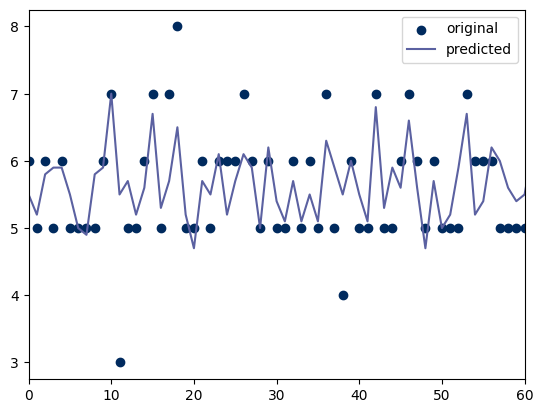

In [ ]:
knn_grafico = grafico(y_test, y_pred)

In [ ]:
#Regressão Linear (LR - Linear Regression)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

linreg_score = metricas(y_test, y_pred, X_train)

resultados(linreg_score)

R2:  0.4031803412796219
R2 ajustado:  0.38186535346817985
MSE:  0.39002514396395493
RMSE:  0.624519930798013
MAE:  0.5035304415524375


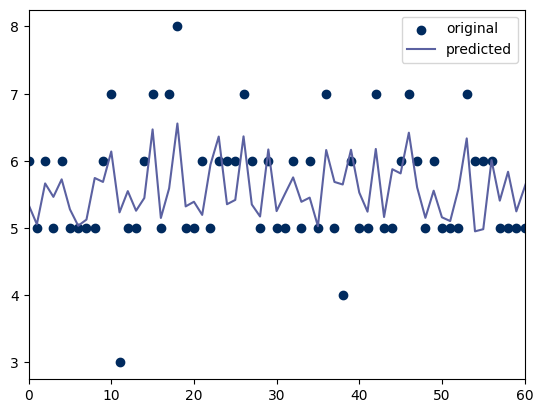

In [ ]:
linreg_grafico = grafico(y_test, y_pred)

In [ ]:
#Árvore de Decisão (Decision Tree Regressor)
max_depth=8

tree = DecisionTreeRegressor(max_depth = max_depth, random_state=0)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

tree_score = metricas(y_test, y_pred, X_train)

resultados(tree_score)

R2:  0.16425237173484497
R2 ajustado:  0.13440424215394653
MSE:  0.5461659720300382
RMSE:  0.7390304269988065
MAE:  0.5178618564468351


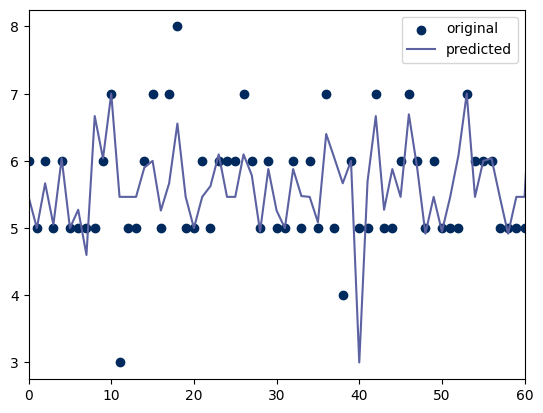

In [ ]:
tree_grafico = grafico(y_test, y_pred)

In [ ]:
#Pool de Árvores (Random Forest Regressor)

rf = RandomForestRegressor(n_estimators=200, random_state = 0, max_depth=1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rf_score = metricas(y_test, y_pred, X_train)

resultados(rf_score)

R2:  0.2323345028649877
R2 ajustado:  0.20491787796730865
MSE:  0.5016739004177528
RMSE:  0.708289418541427
MAE:  0.584210563451242


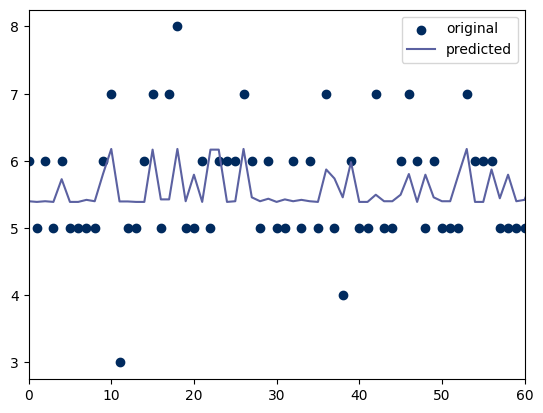

In [ ]:
rf_grafico = grafico(y_test, y_pred)

In [ ]:
#Gradient Boosting Regressor

gb = GradientBoostingRegressor(n_estimators=200, random_state=0, max_depth=1)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

gb_score = metricas(y_test, y_pred, X_train)

resultados(gb_score)

R2:  0.3969333798995851
R2 ajustado:  0.3753952863245703
MSE:  0.3941075698290983
RMSE:  0.6277798737050259
MAE:  0.5040177631419483


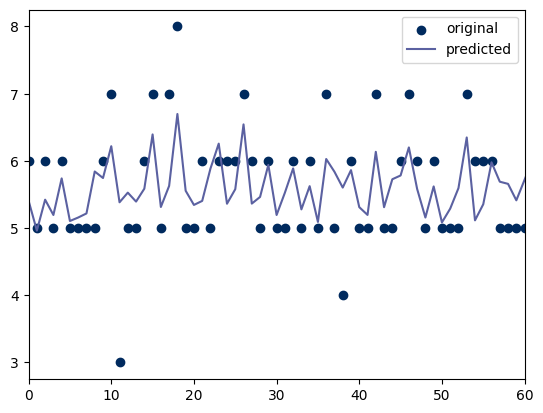

In [ ]:
gb_grafico = grafico(y_test, y_pred)

In [ ]:
#Support Vector Regressor

svr = SVR(gamma = 10, C = 0.1, kernel = "linear")
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

svr_score = metricas(y_test, y_pred, X_train)

resultados(svr_score)

R2:  0.3931151512997907
R2 ajustado:  0.37144069241764033
MSE:  0.3966028045914972
RMSE:  0.629764086457379
MAE:  0.5007925389684187


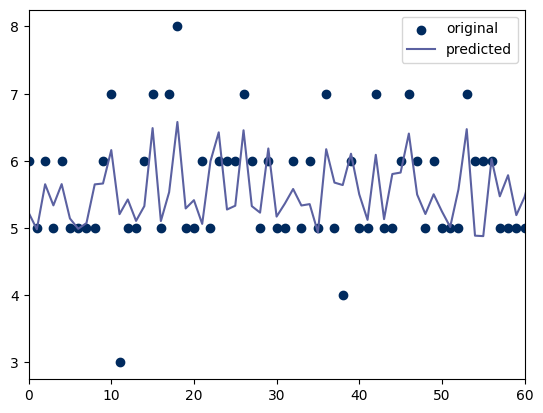

In [ ]:
svr_grafico = grafico(y_test, y_pred)

In [ ]:
#Rede Neural (Multilayer Perceptron Regressor)

mlp = MLPRegressor(random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

mlp_score = metricas(y_test, y_pred, X_train)

resultados(mlp_score)

R2:  0.35066068161617014
R2 ajustado:  0.32746999167389046
MSE:  0.4243470492864015
RMSE:  0.6514192576877057
MAE:  0.5310502625201717


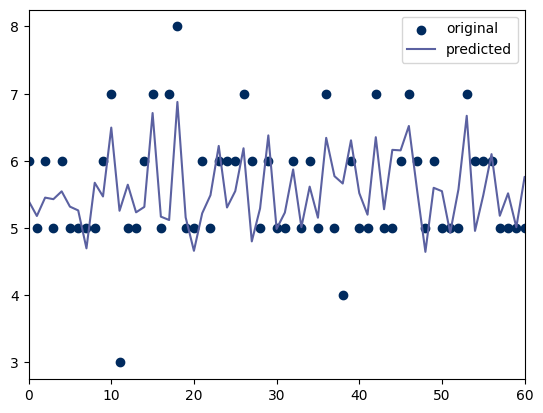

In [ ]:
mlp_grafico = grafico(y_test, y_pred)

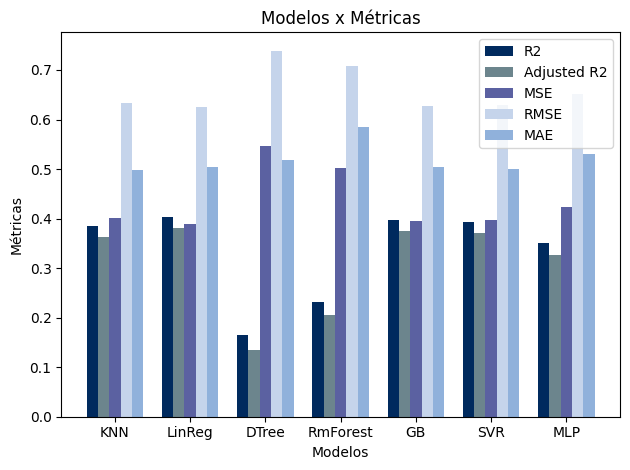

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(7)
y1 = [knn_score[0], linreg_score[0], tree_score[0], rf_score[0], gb_score[0], svr_score[0], mlp_score[0]]
y2 = [knn_score[1], linreg_score[1], tree_score[1], rf_score[1], gb_score[1], svr_score[1], mlp_score[1]]
y3 = [knn_score[2], linreg_score[2], tree_score[2], rf_score[2], gb_score[2], svr_score[2], mlp_score[2]]
y4 = [knn_score[3], linreg_score[3], tree_score[3], rf_score[3], gb_score[3], svr_score[3], mlp_score[3]]
y5 = [knn_score[4], linreg_score[4], tree_score[4], rf_score[4], gb_score[4], svr_score[4], mlp_score[4]]

width = 0.15
plt.bar(x - 0.3, y1, width, color='#002A5E')
plt.bar(x - 0.15, y2, width, color='#6C858D')
plt.bar(x, y3, width, color='#5B61A1')
plt.bar(x + 0.15, y4, width, color='#C5D4EB')
plt.bar(x + 0.3, y5, width, color='#90B1DB')

plt.xticks(x, ['KNN', 'LinReg', 'DTree', 'RmForest', 'GB', 'SVR', 'MLP'])
plt.xlabel("Modelos")
plt.ylabel("Métricas")
plt.legend(["R2", "Adjusted R2", "MSE", "RMSE", "MAE"])
plt.title("Modelos x Métricas")

plt.tight_layout()
plt.show()



<p>1 - Em relação a base de dados selecionada (não pode ser a base de dados disponibilizada no Scikit-learn):</p>
<ul type="none">
  <li>A - Qual o problema tratado nesta base?
    <ul type="none">
      <li>A base retrata as características dos tipos de vinho tinto e branco</li>
    </ul>
  </li>
  <li>B - Quantos exemplos existem nesta base?
    <ul type="none">
      <li>1599</li>
    </ul>
  </li>
  <li>C - Quantos atributos possui a base?
    <ul type="none">
      <li>12</li>
    </ul>
  </li>
  <li>D - Para cada um dos atributos, indique:
    <ol type="I">
      <li>Qual o nome do atributo?</li>
      <li>O que este atributo representa?</li>
      <li>Qual é o tipo deste atributo (nominal ou numérico)?</li>
      <li>Existem valores faltantes para este atributo? Se sim, quantos?</li>
      <li>Quantos valores diferentes este atributo possui?</li>
      <ul type="none">
        <li>- I. fixed acidity, II. A maioria dos ácidos presentes no vinho, III. Numérico, IV. Não, V. 96 </li>
        <li>- I. volatile acidity, II. Quantidade de ácido acético no vinho, III. Numérico, IV. Não, V. 143 </li>
        <li>- I. citric acid, II. Quantidade de ácido cítrico no vinho, III. Numérico, IV. Não, V. 80 </li>
        <li>- I. residual sugar, II. O resíduo de açucar após a fermentação, III. Numérico, IV. Não, V. 91 </li>
        <li>- I. chlorides, II. A quantidade de sal no vinho, III. Numérico, IV. Não, V. 153 </li>
        <li>- I. free sulfur dioxide, II. Quantidade de sulfito presente no vinho, III. Numérico, IV. Não, V. 60 </li>
        <li>- I. total sulfur dioxide, II. Total de SO2 nas formas livre e vinculado, III. Numérico, IV. Não, V. 144 </li>
        <li>- I. density, II. A densidade, III. Numérico, IV. Não, V. 436 </li>
        <li>- I. pH, II. O potencial hidrogeniônico do vinho, III. Numérico, IV. Não, V. 89 </li>
        <li>- I. sulphates, II.Quantidade de sulfato no vinho, III. Numérico, IV. Não, V. 96 </li>
        <li>- I. alcochol, II. Quantidade de álcool no vinho, III. Numérico, IV. Não, V. 65 </li>
        <li>- I. quality, II. A qualidade do vinho, III. Numérico, IV. Não, V. 6 </li>
      </ul>
    <ol>
  </li>
</ul>

<p>2 - Testar os algoritmos de regressão apresentados no tutorial:</p>
<ul type="none">
  <li>A - Para cada algorítmo, apresentar todas as métricas de avaliação de modelos de regressão apresentadas em sala (R², R²a, MSE, RMSE, MAE):
    <ul type="none">
      <li>Acima👆</li>
    </ul>
  </li>
</ul>

<p>3 - Qual o algoritmo testado apresentou a melhor performance? Por que?</p>
<ul type="none">
  <li>O algoritmo de regressão linear, pois apresenta o maior R2.</li>
</ul>

<p>4 - Criar um gráfico comparando o valor real e o valor predito obtido por cada uma das técnicas na etapa de teste.</p>
<ul type="none">
  <li>Acima👆</li>
</ul>






